In [1]:
# import libraries / modules
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import statsmodels.formula.api as smf
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

# thinkstats, thinkstats2, referenced from: Downey, A. (2014).  Think Stats: Exploratory Data Analysis. O’Reilly Media Inc.

In [2]:
# import data
df=pd.read_csv("DSM2019.csv")

In [3]:
# brief check of data to confirm import
df.head()

,PLACE,FNAME,LNAME,DIV,DIV PL,10K,HALF,20MI,LAST_10K,PACE,TIME
0,1,William,Mutai,M3539,1/137,0:33:05,1:10:23,1:49:02,0:33:59,0:05:28,2:23:01
1,2,Sammy,Rotich,M3034,1/124,0:33:06,1:10:23,1:48:57,0:34:30,0:05:29,2:23:26
2,3,Steve,Froeschle,M2529,1/95,0:34:23,1:12:56,1:51:54,0:35:10,0:05:37,2:27:04
3,4,Dan,Froeschle,M2529,2/95,0:34:22,1:12:55,1:53:38,0:37:06,0:05:46,2:30:44
4,5,David,Tuwei,M4044,1/99,0:34:28,1:14:27,1:57:13,0:36:07,0:05:52,2:33:20


In [4]:
# determine imported data types
df.dtypes

PLACE        int64
FNAME       object
LNAME       object
DIV         object
DIV PL      object
10K         object
HALF        object
20MI        object
LAST_10K    object
PACE        object
TIME        object
dtype: object

In [5]:
# change the time fields to read as time
df[["10K","HALF","20MI","LAST_10K","PACE","TIME"]] = df[["10K","HALF","20MI","LAST_10K","PACE","TIME"]].apply(pd.to_timedelta)

In [6]:
# confirm changes, get more info on data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 11 columns):
PLACE       1276 non-null int64
FNAME       1276 non-null object
LNAME       1276 non-null object
DIV         1275 non-null object
DIV PL      1276 non-null object
10K         1276 non-null timedelta64[ns]
HALF        1276 non-null timedelta64[ns]
20MI        1276 non-null timedelta64[ns]
LAST_10K    1276 non-null timedelta64[ns]
PACE        1276 non-null timedelta64[ns]
TIME        1276 non-null timedelta64[ns]
dtypes: int64(1), object(4), timedelta64[ns](6)
memory usage: 109.8+ KB


### A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1). Describe what the 5 variables mean in the dataset (Chapter 1).

In [7]:
# variable creation, description noted below

df['SHALF'] = df['TIME']-df['HALF'] # calculates time for second half of race
df['AVGPCE'] = df['PACE'] / np.timedelta64(1, 's') # converts average pace for entire race into seconds
df['FSTPCE'] = (df['HALF']/13.1) / np.timedelta64(1, 's') # converts average pace for first half into seconds
df['SNDPCE'] = (df['SHALF']/13.1) / np.timedelta64(1, 's') # calculates average pace the second half and converts to seconds
df['DIFF'] = df['SNDPCE']-df['FSTPCE'] #difference between 1st half pace and 2nd half pace, negative meaning faster 2nd half
df['FSTQ'] = (df['10K']/6.21371) / np.timedelta64(1, 's') # converts average pace first 10K into seconds
df['SNDQ'] = ((df['HALF']-df['10K'])/(13.1-6.21371)) / np.timedelta64(1, 's') # calculates pace for 6.88629 miles after 10k
df['TRDQ'] = ((df['20MI']-df['HALF'])/(20-13.1)) / np.timedelta64(1, 's') # calculates pace for 6.9 miles after half
df['FTHQ'] = ((df['TIME']-df['20MI'])/(6.21371)) / np.timedelta64(1, 's') # calculates pace for last 10
df['PACING'] = np.where(df['FSTPCE']>=df['SNDPCE'],'Neg','Pos') # adds a category based on pacing execution

In [8]:
# confirm variable creation
df.head()

,PLACE,FNAME,LNAME,DIV,DIV PL,10K,HALF,20MI,LAST_10K,PACE,...,SHALF,AVGPCE,FSTPCE,SNDPCE,DIFF,FSTQ,SNDQ,TRDQ,FTHQ,PACING
0,1,William,Mutai,M3539,1/137,00:33:05,01:10:23,01:49:02,00:33:59,00:05:28,...,01:12:38,328.0,322.366412,332.671756,10.305344,319.454883,324.993574,336.086957,328.145343,Pos
1,2,Sammy,Rotich,M3034,1/124,00:33:06,01:10:23,01:48:57,00:34:30,00:05:29,...,01:13:03,329.0,322.366412,334.580153,12.213740,319.615817,324.848358,335.362319,332.973377,Pos
2,3,Steve,Froeschle,M2529,1/95,00:34:23,01:12:56,01:51:54,00:35:10,00:05:37,...,01:14:08,337.0,334.045802,339.541985,5.496183,332.007770,335.884780,338.840580,339.571689,Pos
3,4,Dan,Froeschle,M2529,2/95,00:34:22,01:12:55,01:53:38,00:37:06,00:05:46,...,01:17:49,346.0,333.969466,356.412214,22.442748,331.846835,335.884780,354.057971,358.240085,Pos
4,5,David,Tuwei,M4044,1/99,00:34:28,01:14:27,01:57:13,00:36:07,00:05:52,...,01:18:53,352.0,340.992366,361.297710,20.305344,332.812442,348.373362,371.884058,348.744953,Pos


In [9]:
#Create two dataframes based on Positive and Negative from 'Pacing' column
dfp = df[df.PACING == 'Pos']
dfn = df[df.PACING == 'Neg']

In [10]:
# positive split DF
dfp.head()

,PLACE,FNAME,LNAME,DIV,DIV PL,10K,HALF,20MI,LAST_10K,PACE,...,SHALF,AVGPCE,FSTPCE,SNDPCE,DIFF,FSTQ,SNDQ,TRDQ,FTHQ,PACING
0,1,William,Mutai,M3539,1/137,00:33:05,01:10:23,01:49:02,00:33:59,00:05:28,...,01:12:38,328.0,322.366412,332.671756,10.305344,319.454883,324.993574,336.086957,328.145343,Pos
1,2,Sammy,Rotich,M3034,1/124,00:33:06,01:10:23,01:48:57,00:34:30,00:05:29,...,01:13:03,329.0,322.366412,334.580153,12.213740,319.615817,324.848358,335.362319,332.973377,Pos
2,3,Steve,Froeschle,M2529,1/95,00:34:23,01:12:56,01:51:54,00:35:10,00:05:37,...,01:14:08,337.0,334.045802,339.541985,5.496183,332.007770,335.884780,338.840580,339.571689,Pos
3,4,Dan,Froeschle,M2529,2/95,00:34:22,01:12:55,01:53:38,00:37:06,00:05:46,...,01:17:49,346.0,333.969466,356.412214,22.442748,331.846835,335.884780,354.057971,358.240085,Pos
4,5,David,Tuwei,M4044,1/99,00:34:28,01:14:27,01:57:13,00:36:07,00:05:52,...,01:18:53,352.0,340.992366,361.297710,20.305344,332.812442,348.373362,371.884058,348.744953,Pos


In [11]:
# negative split DF
dfn.head()

,PLACE,FNAME,LNAME,DIV,DIV PL,10K,HALF,20MI,LAST_10K,PACE,...,SHALF,AVGPCE,FSTPCE,SNDPCE,DIFF,FSTQ,SNDQ,TRDQ,FTHQ,PACING
5,6,Justin,Vitale,M4044,2/99,00:40:11,01:23:13,02:01:23,00:33:35,00:05:55,...,01:11:44,355.0,381.145038,328.549618,-52.595420,388.012958,374.947904,331.884058,324.121982,Neg
7,8,Clay,Musial,M2024,2/80,00:37:16,01:19:12,02:01:29,00:35:46,00:06:01,...,01:18:02,361.0,362.748092,357.404580,-5.343511,359.849430,365.363643,367.681159,345.204395,Neg
13,14,Hiram,Marquez,M2024,5/80,00:39:45,01:22:46,02:05:51,00:37:39,00:06:15,...,01:20:44,375.0,379.083969,369.770992,-9.312977,383.828663,374.802688,374.637681,363.550922,Neg
14,15,Ethan,Smith,M2024,6/80,00:39:46,01:22:46,02:05:51,00:38:58,00:06:18,...,01:22:02,378.0,379.083969,375.725191,-3.358779,383.989597,374.657472,374.637681,376.103809,Neg
15,16,Ben,Kipp,M3539,2/137,00:39:46,01:22:47,02:07:08,00:38:25,00:06:20,...,01:22:46,380.0,379.160305,379.083969,-0.076336,383.989597,374.802688,385.652174,370.953907,Neg


In [12]:
# HARDLY ANYONE NEGATIVE SPLITS
df['PACING'].value_counts()

Pos    1137
Neg     139
Name: PACING, dtype: int64

In [13]:
# determine the mean pace for the groups
df.groupby('PACING')['AVGPCE'].mean()

PACING
Neg    528.769784
Pos    618.792436
Name: AVGPCE, dtype: float64

In [14]:
# check data types after variable creation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 21 columns):
PLACE       1276 non-null int64
FNAME       1276 non-null object
LNAME       1276 non-null object
DIV         1275 non-null object
DIV PL      1276 non-null object
10K         1276 non-null timedelta64[ns]
HALF        1276 non-null timedelta64[ns]
20MI        1276 non-null timedelta64[ns]
LAST_10K    1276 non-null timedelta64[ns]
PACE        1276 non-null timedelta64[ns]
TIME        1276 non-null timedelta64[ns]
SHALF       1276 non-null timedelta64[ns]
AVGPCE      1276 non-null float64
FSTPCE      1276 non-null float64
SNDPCE      1276 non-null float64
DIFF        1276 non-null float64
FSTQ        1276 non-null float64
SNDQ        1276 non-null float64
TRDQ        1276 non-null float64
FTHQ        1276 non-null float64
PACING      1276 non-null object
dtypes: float64(8), int64(1), object(5), timedelta64[ns](7)
memory usage: 209.5+ KB


### Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000110C000C808>]],
      dtype=object)

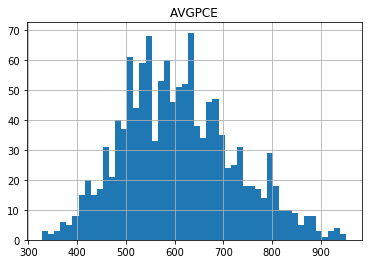

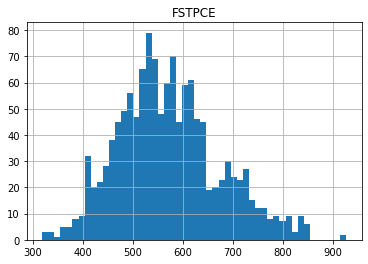

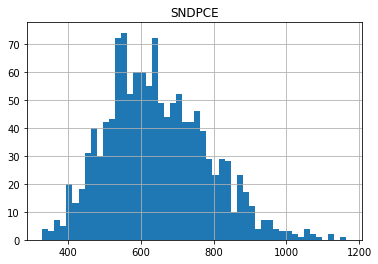

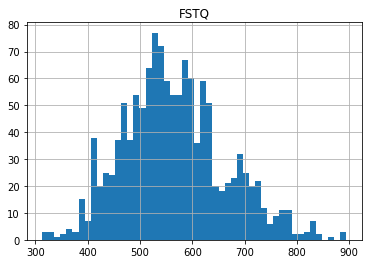

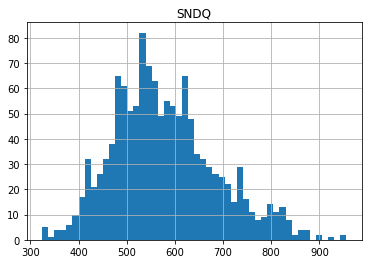

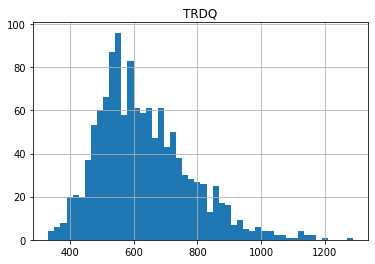

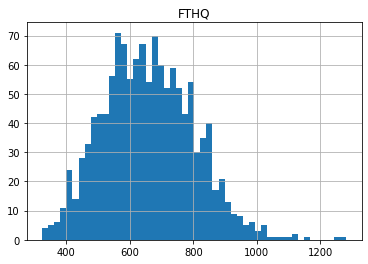

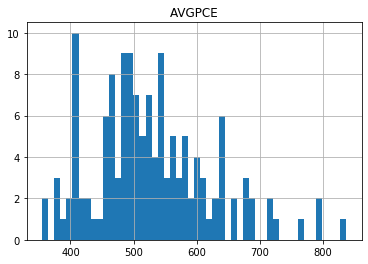

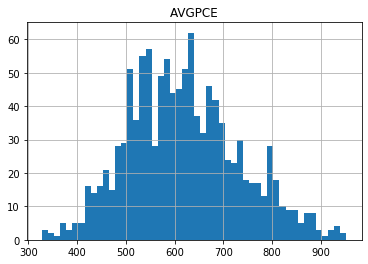

In [15]:
# create histograms
df.hist(column='AVGPCE',bins=50)
df.hist(column='FSTPCE',bins=50)
df.hist(column='SNDPCE',bins=50)
df.hist(column='FSTQ',bins=50)
df.hist(column='SNDQ',bins=50)
df.hist(column='TRDQ',bins=50)
df.hist(column='FTHQ',bins=50)
# avg pace of negative and positive splitters
dfn.hist(column='AVGPCE',bins=50)
dfp.hist(column='AVGPCE',bins=50)



### Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [16]:
df['TIME'].mean(), df['TIME'].var(), df['TIME'].std(), df['TIME'].mode()

(Timedelta('0 days 04:25:42.725705'),
 9.260732252546563e+24,
 Timedelta('0 days 00:50:43.145125'),
 0   03:46:59
 1   04:13:17
 2   04:38:41
 3   04:51:20
 4   04:59:31
 5   05:01:58
 dtype: timedelta64[ns])

In [17]:
df['AVGPCE'].mean(), df['AVGPCE'].var(), df['AVGPCE'].std(), df['AVGPCE'].mode()

(608.9858934169279, 13489.850781240375, 116.14581689083931, 0    543.0
 1    546.0
 dtype: float64)

In [18]:
df['FSTPCE'].mean(), df['FSTPCE'].var(), df['FSTPCE'].std(), df['FSTPCE'].mode()

(572.0013639948173, 10359.362043814128, 101.78095128173113, 0    412.213740
 1    412.366412
 2    412.442748
 3    493.282443
 4    532.519084
 5    533.664122
 6    540.381679
 7    579.160305
 dtype: float64)

In [19]:
df['SNDPCE'].mean(), df['SNDPCE'].var(), df['SNDPCE'].std(), df['SNDPCE'].mode()

(645.0005982430721, 19327.78075650816, 139.02438907079636, 0    545.496183
 1    724.580153
 dtype: float64)

In [20]:
df['FSTQ'].mean(), df['FSTQ'].var(), df['FSTQ'].std(), df['FSTQ'].mode()

(564.9948178849833, 9521.532919059397, 97.57834246931742, 0    411.670323
 dtype: float64)

In [21]:
df['SNDQ'].mean(), df['SNDQ'].var(), df['SNDQ'].std(), df['SNDQ'].mode()

(578.3235847592618, 11544.363007856986, 107.44469743945946, 0    412.994515
 1    489.813818
 2    548.045464
 dtype: float64)

In [22]:
df['TRDQ'].mean(), df['TRDQ'].var(), df['TRDQ'].std(), df['TRDQ'].mode()

(631.0082458765636, 21008.008477859014, 144.94139670176708, 0    467.826087
 1    516.521739
 2    537.971014
 3    647.101449
 4    784.927536
 dtype: float64)

In [23]:
df['FTHQ'].mean(), df['FTHQ'].var(), df['FTHQ'].std(), df['FTHQ'].mode()

(659.1152371828987, 20411.422783022204, 142.868550713662, 0    570.190756
 1    701.513267
 dtype: float64)

In [24]:
df.groupby(['PACING']).groups.keys()

dict_keys(['Neg', 'Pos'])

In [25]:
df['AVGPCE'][df['PACING'] == 'Neg'].mean(), df['AVGPCE'][df['PACING'] == 'Neg'].var(), df['AVGPCE'][df['PACING'] == 'Neg'].std(),  df['AVGPCE'][df['PACING'] == 'Neg'].mode()

(528.7697841726618, 8835.091544155985, 93.99516766385379, 0    408.0
 1    412.0
 2    464.0
 3    483.0
 4    524.0
 5    527.0
 6    541.0
 dtype: float64)

In [26]:
df['AVGPCE'][df['PACING'] == 'Pos'].mean(), df['AVGPCE'][df['PACING'] == 'Pos'].var(), df['AVGPCE'][df['PACING'] == 'Pos'].std(),  df['AVGPCE'][df['PACING'] == 'Pos'].mode()

(618.792436235708, 13183.592442739113, 114.81982600029976, 0    646.0
 dtype: float64)

### Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

In [27]:
pmfA = thinkstats2.Pmf(dfn['FSTPCE'])
pmfB = thinkstats2.Pmf(dfn['SNDPCE'])

In [28]:
pmf1st = thinkstats2.Pmf(df['FSTPCE'], label='First Half Pace')
pmf2nd = thinkstats2.Pmf(df['SNDPCE'], label='Second Half Pace')

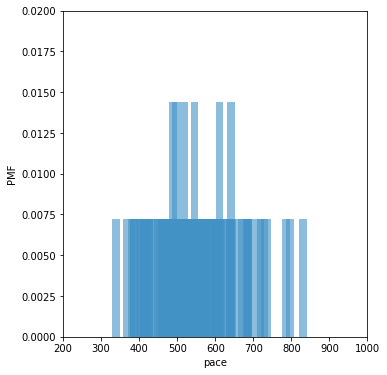

In [29]:
width=20
axis = [200, 1000, 0, 0.02]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmfA, align='right')
thinkplot.Hist(pmfB, align='left',width=width)
thinkplot.Config(xlabel='pace',ylabel='PMF',axis=axis)

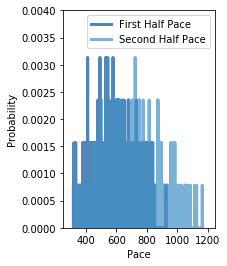

In [30]:
axis = [250, 1250, 0, .004]
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf1st, pmf2nd])
thinkplot.Config(xlabel='Pace',ylabel='Probability', axis=axis)

### Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

In [31]:
# Create CDF
overall_pace=df['AVGPCE']
overall_pace=df['AVGPCE'].dropna()
overall_cdf=thinkstats2.Cdf(overall_pace, label='Overall')

FSTPCE_pace=df['FSTPCE']
FSTPCE_pace=df['FSTPCE'].dropna()
FSTPCE_cdf=thinkstats2.Cdf(FSTPCE_pace, label='1st Half Pace')

SNDPCE_pace=df['SNDPCE']
SNDPCE_pace=df['SNDPCE'].dropna()
SNDPCE_cdf=thinkstats2.Cdf(SNDPCE_pace, label='Second Half Pace')

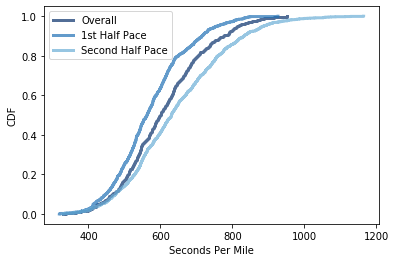

<Figure size 576x432 with 0 Axes>

In [32]:
# Plot CDF
thinkplot.PrePlot(3)
thinkplot.Cdfs([overall_cdf,FSTPCE_cdf,SNDPCE_cdf])
thinkplot.Show(xlabel='Seconds Per Mile',ylabel='CDF')

### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen.
Used Lognormal model, explained on page 56
https://en.wikipedia.org/wiki/Log-normal_distribution


In [33]:
# The following function estimates the parameters of a normal distribution and 
# plots the data and a normal model.

avgpace=df['AVGPCE']

def MakeNormalModel(avgpace):
    cdf = thinkstats2.Cdf(avgpace, label='Average Pace')

    mean, var = thinkstats2.TrimmedMeanVar(avgpace)
    std = np.sqrt(var)
    print('n, mean, std', len(avgpace), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='Model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

n, mean, std 1276 608.388178913738 110.18176728067392


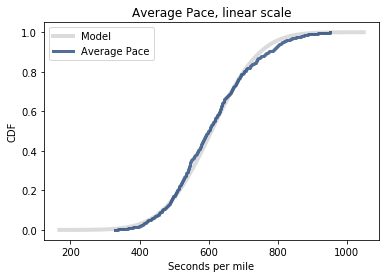

In [34]:
#Here's the distribution of average pace and a normal model, 

MakeNormalModel(avgpace)
thinkplot.Config(title='Average Pace, linear scale', xlabel='Seconds per mile',
                 ylabel='CDF', loc='upper left')

n, mean, std 1276 2.7770564137582054 0.07887863035819541


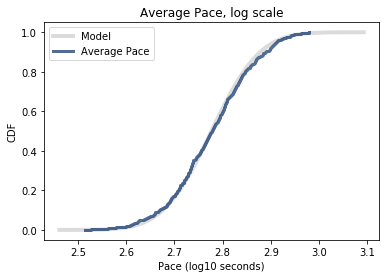

In [35]:
# distribution of average pace and a lognormal model, 
# plotted on a log-x scale. The model is a better fit for the data, 
# although the slower runners are slower than the model expects.

log_paces = np.log10(avgpace)
MakeNormalModel(log_paces)
thinkplot.Config(title='Average Pace, log scale', xlabel='Pace (log10 seconds)',
                 ylabel='CDF', loc='upper left')

In [36]:
#The following function generates a normal probability plot.
def MakeNormalPlot(avgpace):

    mean, var = thinkstats2.TrimmedMeanVar(avgpace, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(avgpace)
    thinkplot.Plot(xs, ys, label='Pace')

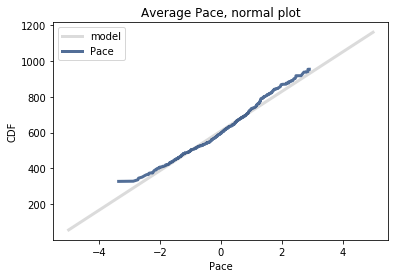

In [37]:
# generate a normal probability plot with average, data deviate from the model

MakeNormalPlot(avgpace)
thinkplot.Config(title='Average Pace, normal plot', xlabel='Pace',
                 ylabel='CDF', loc='upper left')

In [38]:
# If we make a normal probability plot with log weights, the model fit 
# the data well except in the tails, where the slowest people exceed 
# expectations.

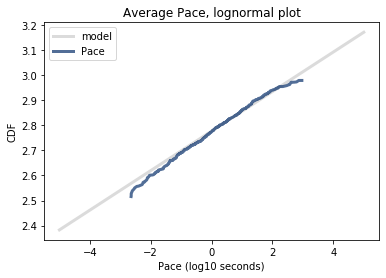

In [39]:
MakeNormalPlot(log_paces)
thinkplot.Config(title='Average Pace, lognormal plot', xlabel='Pace (log10 seconds)',
                 ylabel='CDF', loc='upper left')

### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

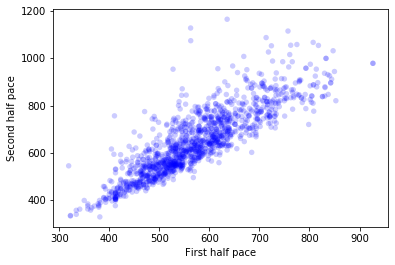

In [40]:
# Compare first and second half paces
FSTPCE=df['FSTPCE']
SNDPCE=df['SNDPCE']

thinkplot.Scatter(FSTPCE, SNDPCE, alpha=0.2)
thinkplot.Config(xlabel='First half pace',
                    ylabel='Second half pace')

In [41]:
#pg 84
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

#pg 85
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

#pg 87
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

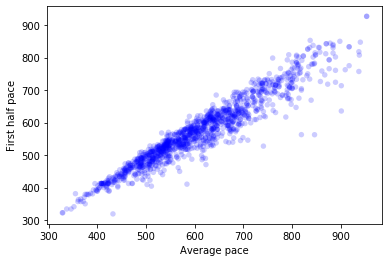

In [42]:
# Plot First half amd average pace
AVRGPCE=df['AVGPCE']
FSTPCE=df['FSTPCE']


thinkplot.Scatter(AVRGPCE, FSTPCE, alpha=0.2)
thinkplot.Config(xlabel='Average pace',
                    ylabel='First half pace')

In [43]:
# First half comparison to average pace

Corr(FSTPCE, AVRGPCE)

0.9515096654620224

In [44]:
SpearmanCorr(FSTPCE, AVRGPCE)

0.9517187086911902

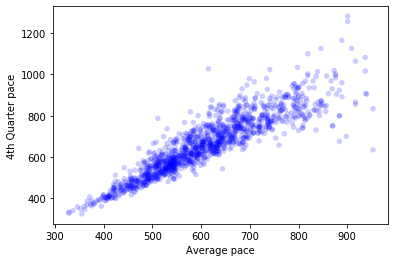

In [45]:
# Plot fourth quarter and average pace
FTHPCE=df['FTHQ']


thinkplot.Scatter(AVRGPCE, FTHPCE, alpha=0.2)
thinkplot.Config(xlabel='Average pace',
                    ylabel='4th Quarter pace')

In [46]:
# fourth comparison to average pace
Corr(FTHPCE, AVRGPCE)

0.9031800951515844

In [47]:
SpearmanCorr(FTHPCE, AVRGPCE)

0.9214131163196431

### Conduct a test on your hypothesis using one of the methods covered in Chapter 9

In [48]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [49]:
data1 = dfp.AVGPCE.values, dfn.AVGPCE.values
ht = DiffMeansPermute(data1)
pvalue = ht.PValue()
pvalue

0.0

P is 0, conclude difference in average pace of the two groups is significant

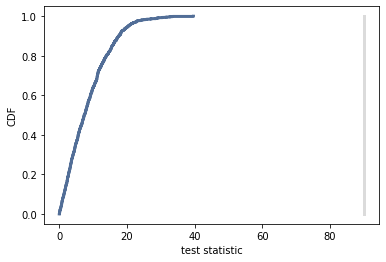

<Figure size 576x432 with 0 Axes>

In [50]:
ht.PlotCdf()
thinkplot.Show(xlabel='test statistic', ylabel='CDF')

### For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [51]:
# dataframe, negative splitters
formula1 = 'AVGPCE ~ FSTPCE'
model = smf.ols(formula1, data=dfn)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 AVGPCE   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.231e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          1.41e-153
Time:                        09:05:40   Log-Likelihood:                -473.88
No. Observations:                 139   AIC:                             951.8
Df Residuals:                     137   BIC:                             957.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6314      3.551      1.867      0.0

In [52]:
# dataframe, negative splitters
formula2 = 'AVGPCE ~ SNDPCE'
model = smf.ols(formula2, data=dfn)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 AVGPCE   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.040e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          6.08e-151
Time:                        09:05:40   Log-Likelihood:                -480.03
No. Observations:                 139   AIC:                             964.1
Df Residuals:                     137   BIC:                             969.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9210      3.753      0.245      0.8

In [53]:
# dataframe, positive splitters
model = smf.ols(formula1, data=dfp)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 AVGPCE   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.146e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        09:05:40   Log-Likelihood:                -5638.0
No. Observations:                1137   AIC:                         1.128e+04
Df Residuals:                    1135   BIC:                         1.129e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7088      5.896     -0.459      0.6

In [54]:
# dataframe, positive splitters
model = smf.ols(formula2, data=dfp)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 AVGPCE   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 2.150e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        09:05:40   Log-Likelihood:                -5304.7
No. Observations:                1137   AIC:                         1.061e+04
Df Residuals:                    1135   BIC:                         1.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.4901      3.777     20.254      0.0